In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras import backend as K
import tensorflow as tf


# Bài1 : Xem lại công thức tính node trong hidden layer, biếu diễn bài toán dưới dạng ma trận. Hiểu hết và chạy lại code (softmax, cross_entropy, batch update).

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
r , c = 28,28

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape)


(60000, 784)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(512,activation="relu",input_shape = (784,)))
model.add(Dense(32,activation= "relu"))
model.add(Dense(num_classes,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss= 'categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

In [ ]:
h = model.fit(x_train,y_train,
              batch_size = batch_size,
              epochs = epochs,
              verbose = 1,
              validation_data = (x_test,y_test))

Epoch 1/12
469/469 [==============================] - 16s 4ms/step - loss: 1.7065 - accuracy: 0.5043 - val_loss: 0.5886 - val_accuracy: 0.8612
Epoch 2/12
469/469 [==============================] - 2s 3ms/step - loss: 0.5376 - accuracy: 0.8699 - val_loss: 0.3947 - val_accuracy: 0.8958
Epoch 3/12
469/469 [==============================] - 2s 3ms/step - loss: 0.3951 - accuracy: 0.8948 - val_loss: 0.3324 - val_accuracy: 0.9085
Epoch 4/12
469/469 [==============================] - 2s 3ms/step - loss: 0.3375 - accuracy: 0.9063 - val_loss: 0.3006 - val_accuracy: 0.9155
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3042 - accuracy: 0.9150 - val_loss: 0.2783 - val_accuracy: 0.9221
Epoch 6/12
469/469 [==============================] - 2s 3ms/step - loss: 0.2810 - accuracy: 0.9215 - val_loss: 0.2613 - val_accuracy: 0.9279
Epoch 7/12
469/469 [==============================] - 2s 3ms/step - loss: 0.2688 - accuracy: 0.9232 - val_loss: 0.2453 - val_accuracy: 0.9307
Epoch

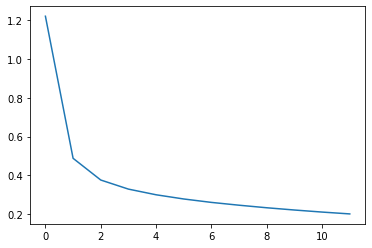

In [ ]:
h.history['loss']
plt.plot(h.history['loss'])
plt.show()

[2]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


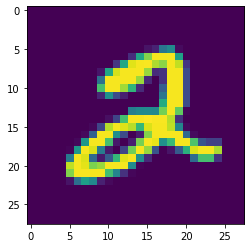

In [ ]:
plt.imshow(x_train[5].reshape(28,28))
print(model.predict_classes(np.array(x_train[5].reshape(-1,784))))


# Bài 2: Chỉnh các hyperparameter: learning rate, activation function, số hidden layer, số node. Thử dùng các model đơn giản hơn (không có hidden layer, 1 hidden layer) hay phức tạp hơn (nhiều hidden layer và node hơn), vẽ loss function theo epoch tương ứng.


In [ ]:
model2 = Sequential()

**model đơn giản hơn**


In [ ]:
model2.add(Dense(32 , activation= "relu",input_shape = (784,)))
model2.add(Dense(num_classes,activation= "softmax"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss = "categorical_crossentropy",
               optimizer = SGD(),
               metrics=['accuracy'])



In [ ]:
h2 = model2.fit(x_train,y_train,
           batch_size = batch_size,
           epochs = epochs,
           verbose = 1,
           validation_data = (x_test,y_test))


Epoch 1/12
469/469 [==============================] - 2s 4ms/step - loss: 1.8233 - accuracy: 0.4600 - val_loss: 0.7633 - val_accuracy: 0.8243
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.8331 - val_loss: 0.5007 - val_accuracy: 0.8707
Epoch 3/12
469/469 [==============================] - 1s 3ms/step - loss: 0.5045 - accuracy: 0.8662 - val_loss: 0.4190 - val_accuracy: 0.8862
Epoch 4/12
469/469 [==============================] - 1s 3ms/step - loss: 0.4273 - accuracy: 0.8831 - val_loss: 0.3781 - val_accuracy: 0.8953
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3924 - accuracy: 0.8910 - val_loss: 0.3541 - val_accuracy: 0.9017
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3681 - accuracy: 0.8978 - val_loss: 0.3363 - val_accuracy: 0.9055
Epoch 7/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3460 - accuracy: 0.9045 - val_loss: 0.3237 - val_accuracy: 0.9079
Epoch 

In [ ]:
h2.history['loss']

[1.3898496627807617,
 0.626649022102356,
 0.47781503200531006,
 0.4182484447956085,
 0.38488098978996277,
 0.3626447916030884,
 0.34648048877716064,
 0.3338412046432495,
 0.32350996136665344,
 0.31477123498916626,
 0.3072330951690674,
 0.3006623387336731]

**model phức tạp hơn**


In [ ]:
model3 = Sequential()

In [ ]:
model3.add(Dense(1024, activation="relu" , input_shape = (784,)))
model3.add(Dense(512, activation="relu"))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(128, activation="relu"))
model3.add(Dense(64,  activation="relu"))
model3.add(Dense(32, activation="relu"))
model3.add(Dense(num_classes, activation="softmax"))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [ ]:
model3.compile(loss = "categorical_crossentropy",
               optimizer = SGD(),
               metrics=['accuracy'])


In [ ]:
h3 = model3.fit(x_train,y_train,
           batch_size = batch_size,
           epochs = epochs,
           verbose = 1,
           validation_data = (x_test,y_test))

Epoch 1/12
469/469 [==============================] - 3s 5ms/step - loss: 1.8479 - accuracy: 0.4432 - val_loss: 0.5068 - val_accuracy: 0.8585
Epoch 2/12
469/469 [==============================] - 2s 4ms/step - loss: 0.4505 - accuracy: 0.8705 - val_loss: 0.3092 - val_accuracy: 0.9111
Epoch 3/12
469/469 [==============================] - 2s 4ms/step - loss: 0.3006 - accuracy: 0.9140 - val_loss: 0.2691 - val_accuracy: 0.9182
Epoch 4/12
469/469 [==============================] - 2s 4ms/step - loss: 0.2376 - accuracy: 0.9319 - val_loss: 0.2022 - val_accuracy: 0.9402
Epoch 5/12
469/469 [==============================] - 2s 4ms/step - loss: 0.2033 - accuracy: 0.9420 - val_loss: 0.1765 - val_accuracy: 0.9471
Epoch 6/12
469/469 [==============================] - 2s 4ms/step - loss: 0.1708 - accuracy: 0.9503 - val_loss: 0.1516 - val_accuracy: 0.9562
Epoch 7/12
469/469 [==============================] - 2s 4ms/step - loss: 0.1478 - accuracy: 0.9582 - val_loss: 0.1404 - val_accuracy: 0.9575
Epoch 

**Vẽ đồ thị loss**

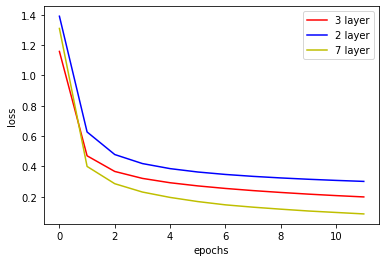

In [ ]:
plt.plot(h.history['loss'], 'r')
plt.plot(h2.history['loss'],'b')
plt.plot(h3.history['loss'],'y')
plt.legend(["3 layer" , "2 layer","7 layer" ])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

**Thử chỉnh activation**

In [ ]:
model4 = Sequential()

**Activation sigmoid**

In [ ]:
model4.add(Dense(512, activation="relu", input_shape = (784,)))
model4.add(Dense(32, activation="relu"))
model4.add(Dense(num_classes, activation="sigmoid"))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 32)                16416     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(loss= "categorical_crossentropy",
               optimizer = SGD(),
               metrics=['accuracy'])

In [ ]:
h4 = model4.fit(x_train,y_train,
           batch_size = batch_size,
           epochs = epochs,
           verbose = 1,
           validation_data = (x_test,y_test))

Epoch 1/12
469/469 [==============================] - 2s 4ms/step - loss: 1.6804 - accuracy: 0.5290 - val_loss: 0.5747 - val_accuracy: 0.8616
Epoch 2/12
469/469 [==============================] - 2s 3ms/step - loss: 0.5230 - accuracy: 0.8710 - val_loss: 0.3872 - val_accuracy: 0.8985
Epoch 3/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3796 - accuracy: 0.8982 - val_loss: 0.3284 - val_accuracy: 0.9112
Epoch 4/12
469/469 [==============================] - 2s 3ms/step - loss: 0.3313 - accuracy: 0.9090 - val_loss: 0.2984 - val_accuracy: 0.9185
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2980 - accuracy: 0.9157 - val_loss: 0.2767 - val_accuracy: 0.9216
Epoch 6/12
469/469 [==============================] - 2s 3ms/step - loss: 0.2792 - accuracy: 0.9219 - val_loss: 0.2594 - val_accuracy: 0.9269
Epoch 7/12
469/469 [==============================] - 2s 3ms/step - loss: 0.2625 - accuracy: 0.9241 - val_loss: 0.2476 - val_accuracy: 0.9289
Epoch 

In [ ]:
h4.history['loss']

[1.1940932273864746,
 0.47488725185394287,
 0.3674207329750061,
 0.32260292768478394,
 0.2944525480270386,
 0.27422064542770386,
 0.2574268579483032,
 0.2433442324399948,
 0.23061122000217438,
 0.21950148046016693,
 0.20944491028785706,
 0.20018553733825684]

Thử activation "softplus""

In [ ]:
model5 = Sequential()

In [ ]:
model5.add(Dense(512, activation="relu",input_shape = (784,)))
model5.add(Dense(32, activation="relu"))
model5.add(Dense(num_classes, activation="softplus"))
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 32)                16416     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.compile(loss= "categorical_crossentropy",
               optimizer = SGD(),
               metrics=['accuracy'])

In [ ]:
h5 = model5.fit(x_train,y_train,
           batch_size = batch_size,
           epochs = epochs,
           verbose = 1,
           validation_data = (x_test,y_test))

Epoch 1/12
469/469 [==============================] - 2s 4ms/step - loss: 1.8484 - accuracy: 0.4779 - val_loss: 0.6673 - val_accuracy: 0.8495
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.5889 - accuracy: 0.8607 - val_loss: 0.4051 - val_accuracy: 0.8939
Epoch 3/12
469/469 [==============================] - 1s 3ms/step - loss: 0.4032 - accuracy: 0.8932 - val_loss: 0.3427 - val_accuracy: 0.9061
Epoch 4/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.9080 - val_loss: 0.3046 - val_accuracy: 0.9156
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3210 - accuracy: 0.9103 - val_loss: 0.2824 - val_accuracy: 0.9207
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2947 - accuracy: 0.9169 - val_loss: 0.2637 - val_accuracy: 0.9245
Epoch 7/12
469/469 [==============================] - 2s 4ms/step - loss: 0.2712 - accuracy: 0.9237 - val_loss: 0.2526 - val_accuracy: 0.9272
Epoch 

**Vẽ đồ thị cho các activation**

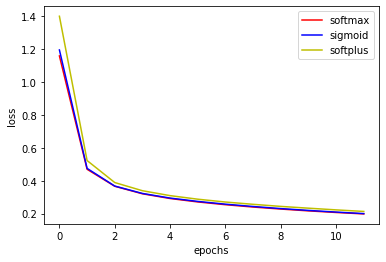

In [ ]:
plt.plot(h.history['loss'], 'r')
plt.plot(h4.history['loss'],'b')
plt.plot(h5.history['loss'],'y')
plt.legend(["softmax" , "sigmoid","softplus" ])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Bài 3 : Phân loại ảnh trong dữ liệu cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
dic = {
    0 : 'airplane',
    1 : 'automobile',
    2 : 'bird',
    3 : 'cat',
    4 : 'deer',
    5 : 'dog',
    6 : 'frog',
    7 : 'horse',
    8 : 'ship',
    9 : 'truck'
}
dic[6]

'frog'

In [ ]:
batch_size = 64
num_classes = 10
epochs =100


In [ ]:
print(y_train[0])


[6]


In [ ]:
x_test = x_test.reshape(-1,3072)
x_train = x_train.reshape(-1,3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape)

(50000, 3072)


In [ ]:
print(y_train[0])
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
model_cau3 = Sequential()

In [ ]:
model_cau3.add(Dense(512,activation= 'relu',input_shape=(3072,)))
model_cau3.add(Dense(32,activation= 'relu'))
model_cau3.add(Dense(num_classes,activation= 'softmax'))

In [ ]:
model_cau3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_7 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 1,590,122
Trainable params: 1,590,122
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_cau3.compile(loss= 'categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

In [ ]:
cau3 = model_cau3.fit(x_train,y_train,
                      batch_size = batch_size,
                      epochs = 10,
                      verbose = 1,
                      validation_data = (x_test,y_test))

Epoch 1/10
782/782 [==============================] - 4s 4ms/step - loss: 2.1046 - accuracy: 0.2272 - val_loss: 1.9098 - val_accuracy: 0.3158
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 1.8024 - accuracy: 0.3623 - val_loss: 1.8396 - val_accuracy: 0.3371
Epoch 3/10
782/782 [==============================] - 3s 3ms/step - loss: 1.7125 - accuracy: 0.3987 - val_loss: 1.7225 - val_accuracy: 0.3817
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 1.6520 - accuracy: 0.4178 - val_loss: 1.7225 - val_accuracy: 0.3743
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 1.6029 - accuracy: 0.4349 - val_loss: 1.6002 - val_accuracy: 0.4301
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5609 - accuracy: 0.4503 - val_loss: 1.7390 - val_accuracy: 0.3748
Epoch 7/10
782/782 [==============================] - 3s 3ms/step - loss: 1.5355 - accuracy: 0.4622 - val_loss: 1.7036 - val_accuracy: 0.3917
Epoch 

**nhận thấy model đã bị overfit**

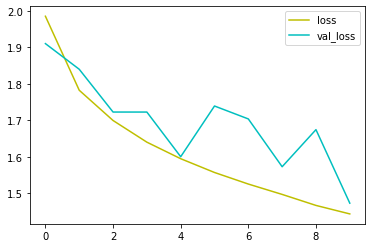

In [ ]:

plt.plot(cau3.history['loss'],'y')
plt.plot(cau3.history["val_loss"],'c')
plt.legend(['loss','val_loss'])
plt.show()

**Thử dự đoán**

truck


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


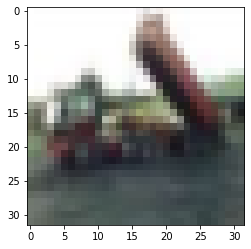

In [ ]:
plt.imshow(x_train[2].reshape(32,32,3))
print(dic[int(model_cau3.predict_classes(np.array(x_train[2]).reshape(-1,1024*3)))])